---
# Examples of 2-D classifications using linear and quadratic discriminant analysis.
---

In this script, we show the differences in classification performances between the linear 
discriminant analysis (LDA) and the quadratic discriminant analysis (QDA) methods.

Both methods are applied to an "experimental" dataset generated from a mixture 
of gaussian probability distribution functions (PDF). Each one is weighted with its 
<i>a priori</i> class probability $P(C_{i})$:

<blockquote>  $P(\bf{x}) = \sum_{i=0}^{N}P(\bf{x}|C_{i}) P(C_{i})$ </blockquote>


The discriminant methods are used to locate the influence zone of each class i over a 
spatial grid. This corresponds to regions where 

<blockquote> $P(\bf{x}|C_{i}) P(C_{i}) > P(\bf{x}|C_{j \ne i}) P(C_{j \ne i})$ </blockquote>

or 

<blockquote> $h_{i}(\bf{x}) > h_{j \ne i}(\bf{x})$ </blockquote>

with the discriminant function $h_{i}(\bf{x})$ defined as

<blockquote>  $h_{i}(\bf{x}) = \ln P(\bf{x}|C_{i}) P(C_{i})$ </blockquote>
<br><br>
 

## Quadratic Discriminant Analysis 
Using the matrix form of the 2-D gaussian PDF, we obtain:

<blockquote>  $h_{i}(\bf{x}) =\frac{1}{2}\ln |\Sigma_{i}| -\frac{1}{2}(\bf{x}-\bf{\mu_{i}})^\top \Sigma_{i}^{-1} (\bf{x}-\bf{\mu_{i}}) + \ln P(C_{i})$  </blockquote>

with 

<blockquote>  The observation:   $\bf{x}=[x_{1} x_{2}]^\top$ </blockquote> 

<blockquote>  The origin:   $\bf{\mu_{i}} = [\mu_{1} \mu_{2}]^\top$  </blockquote> 

<blockquote>  The covariance matrix: $\Sigma_{i} = \begin{pmatrix} \sigma_{x_{1}}^2 & \sigma_{x_{1,2}} \\ \sigma_{x_{1,2}} & \sigma_{x_{2}}^2 \end{pmatrix}$ </blockquote>
<br><br>

## Linear Discriminant Analysis 
The size of the experimental dataset has a large effect on the precision of the classification results. 
If we assume the covariance matrices to be identical (<i>homoscedasticity</i>), we have 
 $\Sigma _{i}=\Sigma$. The shared covariance matrix $\Sigma$ is computed as a weighted mixture of the individual ones:

<blockquote>  $\Sigma = \sum_{i=0}^{N} P(C_{i}) \Sigma_{i}$ </blockquote>

The new discriminant equations are $\bf{linear}$ and can be simplified to:
    
<blockquote>  $h_{i}(\bf{x}) = \bf{\mu_{i}}^\top \Sigma^{-1} \bf{x} - \frac{1}{2}\bf{\mu_{i}}^\top \Sigma^{-1} \bf{\mu_{i}} + \ln P(C_{i})$  </blockquote>


This is a useful approximation to make when the number of data points is small or the dimensionality of the data is high.
<br><br>

This script was designed to handle gaussian mixtures with $\bf{TWO}$ or $\bf{THREE}$ components only. It is easy
to modify it to handle more complex distributions.
<br><br>

# Examples of 2-D probability density functions (PDF) estimated using standard histograms and KDE methods

In this script, we compare PDF estimates based on two approaches; the standard histogram method and the Kernel 
Density Estimation method (KDE). 

We generate a 2-D dataset with a gaussian PDF 

## Naive PDF estimator
The probability density $\hat P(x)$ is proportional to the number of data points $x^{t}$ inside the interval $[x-h, x+h[$ 


<blockquote>  $\hat P(x) = \# \{\{x_{1}<x_{1}^{t}\le x_{1}+h \} \cap \{ x_{2}<x_{2}^{t}\le x_{2}+h \}\} $


with the Top Hat (or Boxcar) kernel

<blockquote>  $W(u) =     
    \begin{cases}
      1, & \text{if} |u| < 1 \\
      0, & \text{otherwise}
    \end{cases}$
</blockquote> 
                    

## PDF with kernel methods
The probability density $\hat P(x)$ can be modeled as the convolution of the data distribution with a kernel $K(u)$ designed to
smooth the experimental PDF

<blockquote>  $\hat P(x) = \frac{1}{Nh}\sum_{t=1}^{N} K(\frac{x-x^{t}}{h})$ </blockquote> 
                                 
The level of smoothing is controled by the bandwidth parameter <i>h</i>. 
<br><br>    


Gaussian and epanechikov kernels are popular kernels. Their 1-D and 2-D expressions are:
    
<blockquote>  1-D Gaussian: $K(u)= \frac{1}{\sqrt{2\pi}} \exp [-\frac{u^{2}}{2}]$ </blockquote>
<blockquote>  2-D Gaussian: $K(u)= \frac{1}{2\pi} \exp [-\frac{u^{2}}{2}]$ </blockquote>
<br><br>

    
<blockquote>  1-D Epanechikov: $K(u)= \frac{3}{4}(1-u^{2})$ for $u \in [-1, 1]$ </blockquote>    
<blockquote>  2-D Epanechikov: $K(u)= \frac{15}{8\pi}(1-u^{2})$ for $u \in [0, 1]$ </blockquote>
<br><br>

In this script, we only use the 2-D version as we process 2-D datasets.
  


In [1]:
print(__doc__)

# Authors: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: XXX

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
from matplotlib.colors import ListedColormap
from matplotlib import colors
from matplotlib import cm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.stats import multivariate_normal
from progress.bar import Bar

import seaborn as sns
sns.set()

Automatically created module for IPython interactive environment


# Dataset generation
We generate a dataset 

In [2]:
# Fixing random state for reproducibility
np.random.seed(42)
        
    
# Parameters of three gaussians PDF
Mu = np.zeros((3,2))
Mu[0,:] = [0., 2.]
Mu[1,:] = [0., 5.]
Mu[2,:] = [6., 4.]

sigma = np.zeros((3,2))
sigma[0,:] = [2., 1.]
sigma[1,:] = [1., 1.]
sigma[2,:] = [1., 3.]

theta = np.array([0., 0., 60]) 
prob_C = np.array([0.3, 0.4, 0.3]) 

npts = 200

x_min, x_max = -5., 9.
y_min, y_max = -1., 8.

In [3]:
# Compute the covariance matrix Sigma for each gaussian PDF
n_PDF = prob_C.shape[0]
Sigma = np.zeros((2, 2, n_PDF))
for n in range(n_PDF):
    cov = np.zeros((2, 2))

    # Rotation matrix
    angle = np.radians(theta[n])
    c, s = np.cos(angle), np.sin(angle)
    R = np.array([[c, -s], [s, c]])

    # Covariance matrix for a PDF with its principal axes oriented along the x and y directions
    C = np.array([[sigma[n,0]**2, 0.],[0., sigma[n,1]**2]])

    # Covariance matrix after rotation
    Sigma[:,:,n] = R.dot(C.dot(R.T))


In [4]:
# Number of data points allocated to each PDF 
nc = (npts*prob_C).astype(int)

# Generate a dataset from the PDF component #0
X = np.random.multivariate_normal(Mu[0,:], Sigma[:,:,0], nc[0])
y = np.zeros(nc[0])        

for i in range(1,n_PDF):
    # Generate a dataset from the PDF component #i
    Xi = np.random.multivariate_normal(Mu[i,:], Sigma[:,:,i], nc[i])
    yi = i*np.ones(nc[i])

    # Store the dataset
    X = np.r_[X, Xi]        
    y = np.hstack((y, yi))
    
y = y.astype(int)

In [5]:
# Generate a spatial grid where the PDF will be evaluated locally.
nbins= 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nbins), np.linspace(y_min, y_max, nbins))
pos = np.dstack((xx, yy)) 
Xgrid = np.c_[xx.ravel(), yy.ravel()]

# Compute the global PDF as a sum of weighted PDF
pdf_true = 0
for n in range(n_PDF):
    model = multivariate_normal(Mu[n,:], Sigma[:,:,n]) 
    pdf_true +=prob_C[n]*model.pdf(pos)

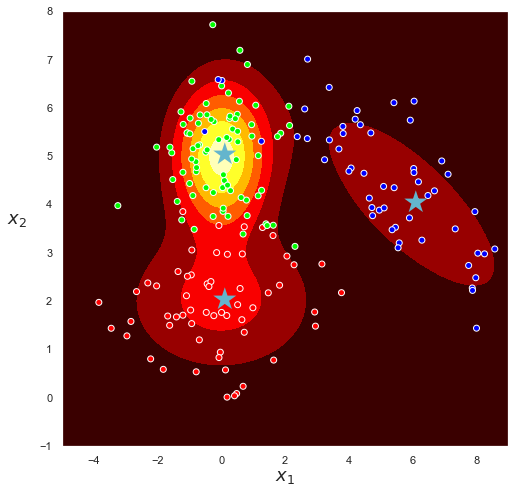

In [6]:
# Remove datapoints outside figure limits
indx = np.argwhere((X[:,0]>x_min) & (X[:,0]<x_max) & (X[:,1]>y_min) & (X[:,1]<y_max)).ravel()
X2 = X[indx,:]
y2 = y[indx]   


cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.get_cmap('hot')

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111)
ax.contourf(xx, yy, pdf_true, cmap=cm)
ax.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm_bright, edgecolors='w')

# # Origin of the PDF
for n in range(n_PDF):
    plt.text(Mu[n,0], Mu[n,1], '$\star$', horizontalalignment='center', verticalalignment='center', fontsize=60, color='c')

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5, -0.05)

#    plt.savefig(figName, format='png')

plt.show()

In [7]:
# Quadratic Discriminant Analysis (QDA)
discriminant = QuadraticDiscriminantAnalysis(store_covariance=True)
# Predicted class on dataset
C_qda = discriminant.fit(X, y).predict(Xgrid) 
C_qda = C_qda.reshape(xx.shape)

In [8]:
def compute_KDE_pdf(npts, nc, h_gaussian, h_epanechikov, X, y, Xgrid, nbins, prob_C):

    pdf_g = np.zeros((nbins,nbins,3))
    pdf_e = np.zeros((nbins,nbins,3))

    for i in range(npts):    
        dX = (X[i,:] - Xgrid)
        dX2 = dX[:,0]**2 + dX[:,1]**2        

        u2 = dX2/h_gaussian**2
        pdf_g[:,:,y[i]] += gaussian_2D(u2).reshape(nbins,nbins)

        u2 = dX2/h_epanechikov**2
        pdf_e[:,:,y[i]] += epanechikov_2D(u2).reshape(nbins,nbins)
        
    # Normalisation
    for i in range(3):
        pdf_g[:,:,i] /= (nc[i]*h_gaussian**2)
        pdf_e[:,:,i] /= (nc[i]*h_epanechikov**2)   
        
    # Normalisation using a priori calss probabilities
    for i in range(3):
        pdf_g[:,:,i] *= prob_C[i]
        pdf_e[:,:,i] *= prob_C[i]
        
    # Find winning class
    C_g = np.argmax(pdf_g, axis=2)
    C_e = np.argmax(pdf_e, axis=2)
    
    return (pdf_g, pdf_e, C_g, C_e)
        

# KDE kernels
def gaussian_2D(u2):
    y = np.exp(-u2/2)/(2*np.pi)
    return y

def epanechikov_2D(u2): 
    y = (15/(8*np.pi))*(1-u2)
    indx = np.where(u2>=1)
    y[indx] = 0
    return y

In [9]:
def display_KDE_classification_results(pdf_KDE_gauss, pdf_KDE_epa, C_g, C_e, X, y, Xgrid, figName):

    cm_dim = ListedColormap(['#BB0000', '#00BB00', '#0000BB'])
    cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cm = plt.get_cmap('hot')

    fig, axs = plt.subplots(2,2, figsize=(15,15), sharex=True, sharey=True) 
    for k in range(4):
        ax = axs.ravel()[k]
        if (k==0):
            ax.contourf(xx, yy, pdf_true, cmap=cm)
            ax.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm_bright, edgecolors='w')
            ax.set_title('True PDF', fontsize=18, color='k')
        elif (k==1):
            ax.pcolormesh(xx, yy, C_qda, cmap=cm_dim, norm=colors.Normalize(0., 2.), zorder=0) 
            ax.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm_bright, edgecolors='w')
            ax.set_title('QDA', fontsize=18, color='k')
        elif (k==2):
            ax.pcolormesh(xx, yy, C_g, cmap=cm_dim, norm=colors.Normalize(0., 2.), zorder=0) 
            ax.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm_bright, edgecolors='w')
            ax.set_title('KDE (Gaussian Kernel)', fontsize=18, color='k')
        else:
            ax.pcolormesh(xx, yy, C_e, cmap=cm_dim, norm=colors.Normalize(0., 2.), zorder=0) 
            ax.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm_bright, edgecolors='w')
            ax.set_title('KDE (Epanechikov Kernel)', fontsize=18, color='k')

        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])
        ax.set_xlabel('$x_{1}$', fontsize=14)
        ax.set_ylabel('$x_{2}$', fontsize=14, rotation=0)
        ax.yaxis.set_label_coords(-0.15, 0.5) 
        ax.grid(None)  
        ax.grid(None)  
        
    plt.savefig(figName, format='png')

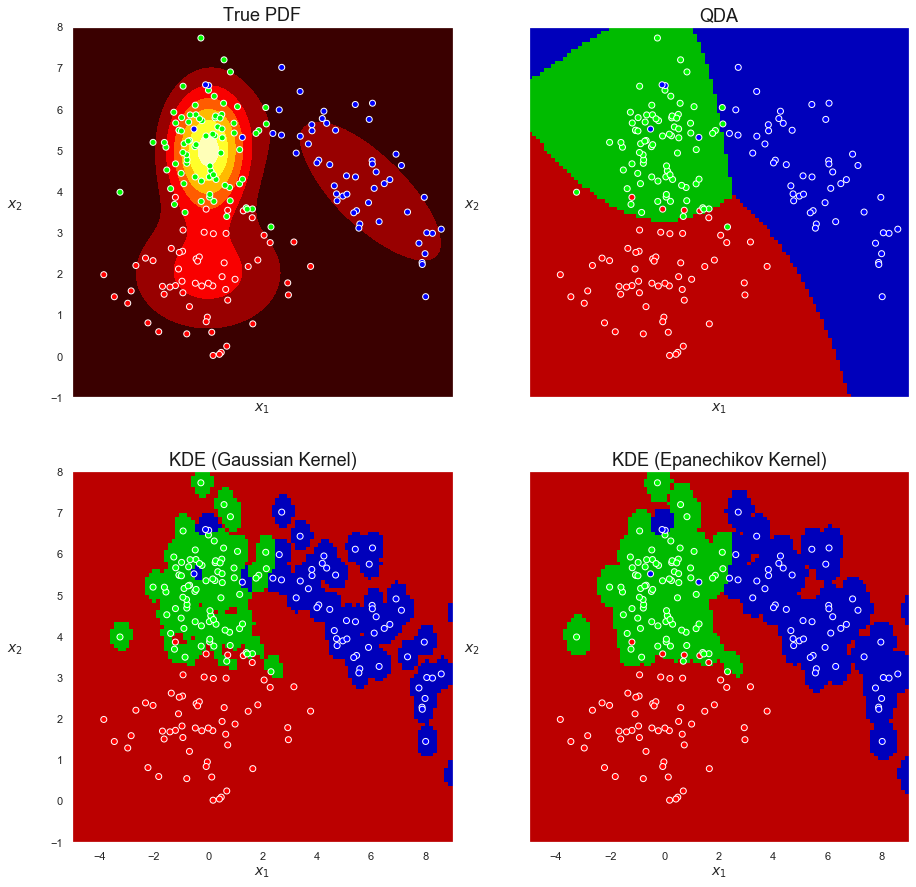

In [10]:
h_gaussian = 0.01
h_epanechikov = 0.5

(pdf_KDE_gauss, pdf_KDE_epa, C_g, C_e) = compute_KDE_pdf(npts, nc, h_gaussian, h_epanechikov, X, y, Xgrid, nbins, prob_C)

figName = '2D_KDE_classif_hg_0.01_he_0.5.png'
display_KDE_classification_results(pdf_KDE_gauss, pdf_KDE_epa, C_g, C_e, X, y, Xgrid, figName)

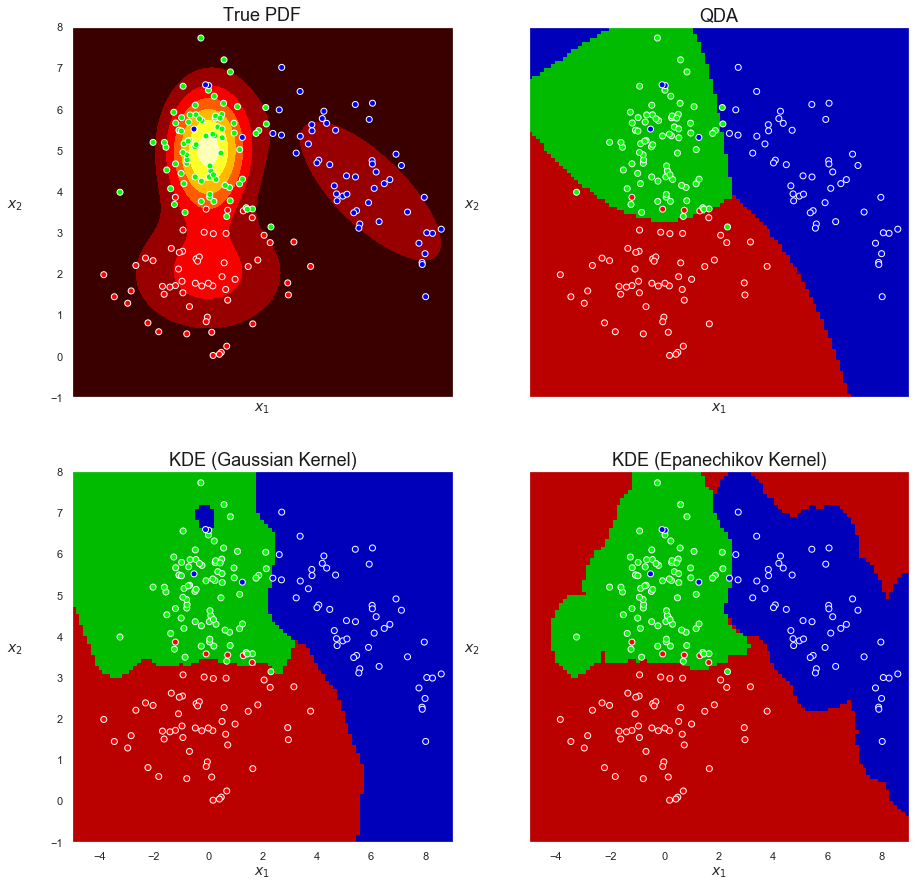

In [11]:
h_gaussian = 0.3
h_epanechikov = 1

(pdf_KDE_gauss, pdf_KDE_epa, C_g, C_e) = compute_KDE_pdf(npts, nc, h_gaussian, h_epanechikov, X, y, Xgrid, nbins, prob_C)

figName = '2D_KDE_classif_hg_0.3_he_1.0.png'
display_KDE_classification_results(pdf_KDE_gauss, pdf_KDE_epa, C_g, C_e, X, y, Xgrid, figName)

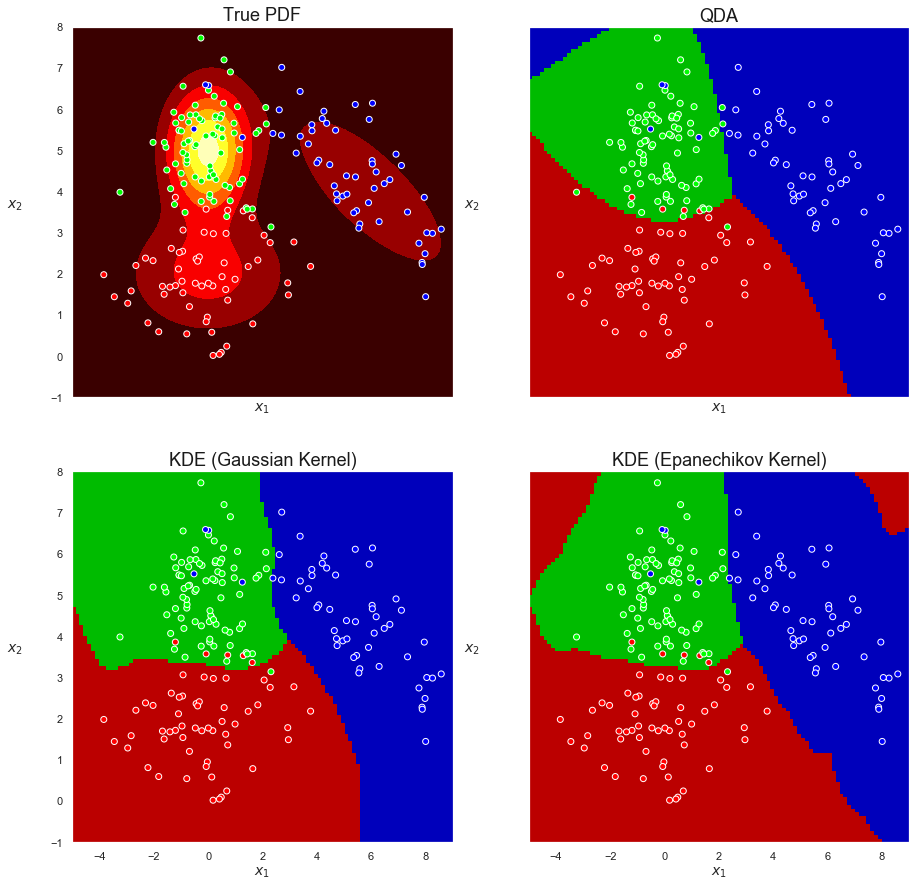

In [12]:
h_gaussian = .6
h_epanechikov = 2

(pdf_KDE_gauss, pdf_KDE_epa, C_g, C_e) = compute_KDE_pdf(npts, nc, h_gaussian, h_epanechikov, X, y, Xgrid, nbins, prob_C)

figName = '2D_KDE_classif_hg_0.6_he_2.0.png'
display_KDE_classification_results(pdf_KDE_gauss, pdf_KDE_epa, C_g, C_e, X, y, Xgrid, figName)